## 1. Árboles de Decisión y Random Forest

### Limpieza del set de datos

Primero importaremos la librería pandas para manejar el set de datos y os para obtener el path para abrir el archivo

In [3]:
import pandas as pd
import os
import numpy as np
np.random.seed(1234)

Abrimos el archivo indexando por ```PassengerId```

Para esta actividad se usó la base de datos de supervivencia del titanic que se puede obtener del siguiente link: https://www.kaggle.com/datasets/yasserh/titanic-dataset 

In [4]:
data = pd.read_csv("bd_titanic.csv", index_col=0)
data

,Name,Ticket,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,,,,
1,"Braund, Mr. Owen Harris",A/5 21171,S,3,male,22.0,1.0,0.0,7.2500,0.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C,1,female,38.0,1.0,0.0,71.2833,1.0
3,"Heikkinen, Miss. Laina",STON/O2. 3101282,S,3,female,26.0,0.0,0.0,7.9250,1.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,S,1,female,35.0,1.0,0.0,53.1000,1.0
5,"Allen, Mr. William Henry",373450,S,3,male,35.0,0.0,0.0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...,...
887,"Montvila, Rev. Juozas",211536,S,2,male,27.0,0.0,0.0,13.0000,0.0
888,"Graham, Miss. Margaret Edith",112053,S,1,female,19.0,0.0,0.0,30.0000,1.0
889,"Johnston, Miss. Catherine Helen ""Carrie""",W./C. 6607,S,3,female,NaN,1.0,2.0,23.4500,0.0


Vemos que datos no tenemos 

In [5]:
data.isna().sum()

Name          7
Ticket        6
Embarked      3
Pclass        0
Sex           1
Age         179
SibSp         3
Parch         4
Fare          2
Survived      3
dtype: int64

Hay ciertos datos, como ```Name``` y ```Ticket``` que no son relevantes para el árbol de clasificación por lo que no nos importa si tenemos el dato exacto o no. Por lo tanto, eliminaremos las entradas que tengan ```NaN``` y sean pocos de estos por columna (como ```Sex```, ```SibSp``` y ```Parch``` por ejemplo). Asimismo, hay muchas entradas que no tienen la edad por lo que eliminaremos esa columna para no perder una gran cantidad de datos.

In [6]:
data.drop("Age", axis=1, inplace=True)
data.dropna(subset=["Embarked", "Sex", "SibSp", "Parch", "Fare", "Survived"], inplace=True)
data

,Name,Ticket,Embarked,Pclass,Sex,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,,,
1,"Braund, Mr. Owen Harris",A/5 21171,S,3,male,1.0,0.0,7.2500,0.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C,1,female,1.0,0.0,71.2833,1.0
3,"Heikkinen, Miss. Laina",STON/O2. 3101282,S,3,female,0.0,0.0,7.9250,1.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,S,1,female,1.0,0.0,53.1000,1.0
5,"Allen, Mr. William Henry",373450,S,3,male,0.0,0.0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...
887,"Montvila, Rev. Juozas",211536,S,2,male,0.0,0.0,13.0000,0.0
888,"Graham, Miss. Margaret Edith",112053,S,1,female,0.0,0.0,30.0000,1.0
889,"Johnston, Miss. Catherine Helen ""Carrie""",W./C. 6607,S,3,female,1.0,2.0,23.4500,0.0


### Comprensión de los datos

#### 1.

Primero buscaremos ver si hay una relación entre supervivencia y ```Pclass```

In [7]:
data.groupby("Pclass").mean()["Survived"]

/var/folders/5r/rdml36vj1glc83x9vdlgr5_40000gn/T/ipykernel_1263/4011012539.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Pclass").mean()["Survived"]


Pclass
1    0.622642
2    0.477778
3    0.246377
Name: Survived, dtype: float64

Se observa claramente que entre mayor es la clase, mayor es la supervivencia.

#### 2.

Buscaremos ahora una relación entre supervivencia y `Sex`.

In [8]:
data.groupby("Sex").mean()["Survived"]

/var/folders/5r/rdml36vj1glc83x9vdlgr5_40000gn/T/ipykernel_1263/3359518425.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Sex").mean()["Survived"]


Sex
female    0.74026
male      0.19224
Name: Survived, dtype: float64

Veremos ahora estas dos estadísticas por `Sex` y `Pclass`.

In [9]:
data.groupby(["Sex", "Pclass"]).mean()["Survived"]

/var/folders/5r/rdml36vj1glc83x9vdlgr5_40000gn/T/ipykernel_1263/330077015.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(["Sex", "Pclass"]).mean()["Survived"]


Sex     Pclass
female  1         0.966667
        2         0.920000
        3         0.503497
male    1         0.368852
        2         0.161905
        3         0.138235
Name: Survived, dtype: float64

#### 3.

Buscaremos ahora ver si hay una relación entre puerto de embarque y supervivencia.

In [10]:
data.groupby(["Embarked"]).mean()["Survived"]

/var/folders/5r/rdml36vj1glc83x9vdlgr5_40000gn/T/ipykernel_1263/743911533.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(["Embarked"]).mean()["Survived"]


Embarked
C    0.554217
Q    0.394737
S    0.339652
Name: Survived, dtype: float64

Se observa que la mayoría de los que embarcaron en Cherbourg sobrevivieron.

Finalmente veremos si hay alguna relación entre la tarifa del pasaje `Fare` y `Pclass`.

In [11]:
data.groupby("Pclass").describe()["Fare"]

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,212.0,83.546836,78.497216,0.0,30.6958,57.9792,93.5,512.3292
2,180.0,20.428287,12.931052,0.0,13.0000,14.2500,26.0,73.5000
3,483.0,13.734246,11.829019,0.0,7.7500,8.0500,15.5,69.5500


Se observa claramente que los pasajes más caros corresponden a los de primera clase y los más baratos a los de tercera clase. Esto era esperado.

### Pre-procesamiento de los datos

Revisamos la cantidad de categorías por columna

In [12]:
data.nunique()

Name        868
Ticket      666
Embarked      3
Pclass        3
Sex           2
SibSp         7
Parch         7
Fare        245
Survived      2
dtype: int64

Como haremos un árbol de decisión, no nos sirve para clasificar ni el `Name` ni `Ticket` del pasajero. Es por esto que eliminaremos estas columnas para entrenar el modelo. Asimismo, la columna `Fare` toma muchos valores posibles por lo que la tranformaremos en categórica. Tendremos entonces:

1. `Low`: `Fare < 15`
2. `Medium`: `15 <= Fare < 30`
3. `High`: `30 <= Fare`

Estos números fueron decididos en base a lo hecho en la actividad 2.

In [13]:
data_training = data.drop(["Name", "Ticket"], axis=1)

# Para este análisis se usó la actividad 2 
data_training["Fare"] = pd.cut(data_training.Fare, bins=[-1, 15, 30, 550], labels=["Low", "Medium", "High"])

data_training

,Embarked,Pclass,Sex,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,
1,S,3,male,1.0,0.0,Low,0.0
2,C,1,female,1.0,0.0,High,1.0
3,S,3,female,0.0,0.0,Low,1.0
4,S,1,female,1.0,0.0,High,1.0
5,S,3,male,0.0,0.0,Low,0.0
...,...,...,...,...,...,...,...
887,S,2,male,0.0,0.0,Low,0.0
888,S,1,female,0.0,0.0,Medium,1.0
889,S,3,female,1.0,2.0,Medium,0.0


Luego, utilizaremos la función `get_dummies()` de `pandas` para pasar las columnas de strings a valores númericos

In [14]:
data_training = pd.get_dummies(data_training, columns=["Sex", "Fare", "Embarked"])
data_training

,Pclass,SibSp,Parch,Survived,Sex_female,Sex_male,Fare_Low,Fare_Medium,Fare_High,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,3,1.0,0.0,0.0,0,1,1,0,0,0,0,1
2,1,1.0,0.0,1.0,1,0,0,0,1,1,0,0
3,3,0.0,0.0,1.0,1,0,1,0,0,0,0,1
4,1,1.0,0.0,1.0,1,0,0,0,1,0,0,1
5,3,0.0,0.0,0.0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,0.0,0.0,0.0,0,1,1,0,0,0,0,1
888,1,0.0,0.0,1.0,1,0,0,1,0,0,0,1
889,3,1.0,2.0,0.0,1,0,0,1,0,0,0,1


Nos interesa ahora saber el tamaño del dataset con el que trabajaremos

In [15]:
data_training.shape

(875, 12)

Ahora debemos separar los datos en la matriz de características (`X`) y el vector de etiquetas (`y`) para trabajar con el

In [16]:
X = data_training.loc[:, data_training.columns != "Survived"]
y = data_training["Survived"]

Utilizaremos `train_test_split` de `sklearn.model_selection` para dividir los datos en sets de entrenamiento y test. Elegiremos un 80% de los datos para entrenar y 20% para test. Esto de acuerdo a lo visto en clases que recomendaba utilizar 60-80% para entrenamiento y 20-40% para test.

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Veremos el tamaño de nuestros sets

In [18]:
print(f"Tamaño X train {X_train.shape}")
print(f"Tamaño y train {y_train.shape}")
print(f"Tamaño X test  {X_test.shape}")
print(f"Tamaño y test  {y_test.shape}")

Tamaño X train (700, 11)
Tamaño y train (700,)
Tamaño X test  (175, 11)
Tamaño y test  (175,)


Mediremos ahora la cantidad de `Survived` en cada set.

In [19]:
print(f"Survived en set entrenamiento: {y_train.sum()}")
print(f"Survived en set test: {y_test.sum()}")

Survived en set entrenamiento: 275.0
Survived en set test: 62.0


Sin embargo, nos interesa la proporción de estos.

In [20]:
print(f"Survived en set entrenamiento: {y_train.sum()/y_train.count()}")
print(f"Survived en set test: {y_test.sum()/y_test.count()}")
print(f"Survived en todo el set: {y.sum()/y.count()}")

Survived en set entrenamiento: 0.39285714285714285
Survived en set test: 0.35428571428571426
Survived en todo el set: 0.3851428571428571


Se ve que están aceptablemente balanceadas ya que ningún set se aleja mucho de la proporción real. Si están demasiado desbalanceadas existe el riesgo de que el modelo no entrene bien y no pueda generalizar, así como existe el riesgo de que haga overfitting.

### Entrenando un árbol de decisión

Utilizaremos `sklearn` para entrenar un árbol de decisión

In [21]:
from sklearn.tree import DecisionTreeClassifier

Elegimos un `max_depth` relativamente bajo para evitar riesgo de overfitting y el criterio de `entropy` porque fue el visto en clases.

In [22]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

Evaluaremos ahora la calidad de nuestra predicción. (Fuente: https://www.datacamp.com/tutorial/decision-tree-classification-python)

In [23]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

0.7942857142857143

Vemos que nuestro árbol tiene un rendimiento de aproximadamente 83.4% como los datos de `test`.

Visualicemos ahora los resultados con su matriz de confusión

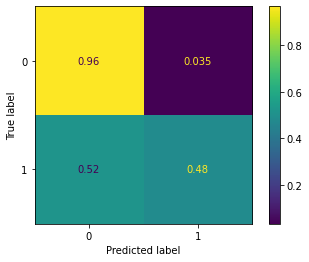

In [24]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

### Entrenando un Random Forest

Utilizaremos `sklearn` para entrenar un Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

Entrenamos nuestro random forest.

In [26]:
random_forest = RandomForestClassifier(criterion="entropy", max_depth=3)
random_forest.fit(X_train, y_train)
y_predict = random_forest.predict(X_test)

Medimos su rendimiento con el set de `test`.

In [27]:
metrics.accuracy_score(y_test, y_predict)

0.7771428571428571

Observamos que tiene un rendimiento de 80% con el set de `test`.

Visualicemos ahora los resultados con su matriz de confusión

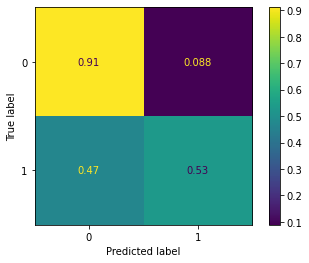

In [28]:
conf_mat = metrics.confusion_matrix(y_test, y_predict, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()